# Example using PyMC3

Here's an example of using [PyMC3](http://docs.pymc.io/) to fit a linear model with a Gaussian likelihood. It's basically a copy of the example given [here](http://docs.pymc.io/notebooks/getting_started.html). 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as pl
import pymc3 as pm

In [8]:
# set true gradient and y-intercept for a linear model
m = 3.5 # gradient
c = 1.2 # y-intercept

# set the "predictor variable"/abscissa
x = np.linspace(0., 10., 100) # 100 points linearly spaced between 0 and 10

# create some "data" - the model plus Gaussian noise
sigma = 0.4 # standard deviation of noise
y = m*x + c + np.random.randn(len(x))*sigma

In [9]:
# set the PyMC3 model
linear_model = pm.Model()

with linear_model:
    # set priors for unknown parameters
    mmodel = pm.Uniform('m', lower=-10., upper=10.) # uniform prior on gradient
    cmodel = pm.Uniform('c', lower=-10., upper=10.) # uniform prior on gradient
    
    sigmamodel = sigma # set a single standard deviation
    
    # Expected value of outcome, aka "the model"
    mu = mmodel*x + cmodel
    
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigmamodel, observed=y)

In [10]:
# perform sampling
with linear_model:
    start = pm.find_MAP()  # Find starting value by optimization
    trace = pm.sample(10000, start=start, tune=1000, discard_tuned_samples=True) # 10000 iterations, with 1000 iteration burn-in 

logp = -51.26, ||grad|| = 13.921: 100%|██████████| 15/15 [00:00<00:00, 2109.67it/s]  
100%|██████████| 11000/11000 [00:09<00:00, 1107.59it/s]


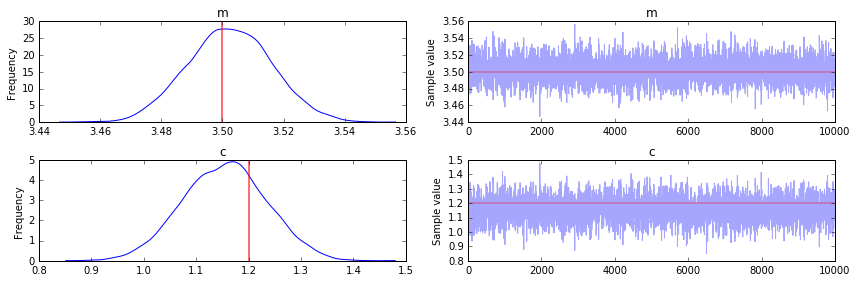

In [12]:
# plot trace output (overplot the true values)
_ = pm.traceplot(trace, lines={'m': m, 'c': c})

In [13]:
# set the PyMC3 model (this time have sigma as unknown)
linear_model_sigma = pm.Model()

with linear_model_sigma:
    # set priors for unknown parameters
    mmodel = pm.Uniform('m', lower=-10., upper=10.)         # uniform prior on gradient
    cmodel = pm.Normal('c', mu=0., sd=10.)                  # Gaussian prior on gradient
    sigmamodel = pm.Uniform('sigma', lower=0.01, upper=10.) # uniform prior on unknown standard deviation
    
    # Expected value of outcome, aka "the model"
    mu = mmodel*x + cmodel
    
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigmamodel, observed=y)

In [14]:
# perform sampling
with linear_model_sigma:
    start = pm.find_MAP()  # Find starting value by optimization
    trace = pm.sample(10000, start=start, tune=1000, discard_tuned_samples=True) # 10000 iterations, with 1000 iteration burn-in 

logp = -inf, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 724.09it/s]
  0%|          | 0/11000 [00:00<?, ?it/s]


ValueError: Bad initial energy: inf. The model might be misspecified.